In [1]:
import numpy as np
import cv2, time

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt

In [16]:
# %load id_all.py
import numpy as np
from skimage import io
import cv2

class Recognizer:
	def __init__(self,path_to_files='./masks'):
		self.no_imgs = [None]*10
		for i in range(10):
			filename = path_to_files+'/{}.png'.format(i)
			self.no_imgs[i] = self.clean_img(io.imread(filename)[:,:,:3])
		self.messup_img =  self.clean_img(io.imread(path_to_files+'/messup.png')[35:67,101:153,:3])
		self.gob_names = ['good','okay','bad']
		gob_thresh = [100,90,95]
		self.gobs = {}
		for i in range(3):
			img = self.clean_img(io.imread('../masks/{}.png'.format(self.gob_names[i])))
			self.gobs[self.gob_names[i]] = Gob_Signal(img,gob_thresh[i])
		
		self.no_thresh = 60
		self.messup_thresh = 60

		self.reset()

	def reset(self):
		self.last_score = 0
		self.messed_up = False
		for k,v in self.gobs.items():
			v.last_on = False

	def clean_img(self,img_to_clean):
		img_to_clean = img_to_clean[:,:,:3]
		rgb = [0,255,0]
		mask = np.where(np.all(img_to_clean == rgb,axis=-1))
		img_to_clean[mask] = [-1,-1,-1]
		return img_to_clean

	def no_test(self,img_to_test):
		try:
			return self.no_tester(img_to_test)
		except:
			return self.last_score

	def no_tester(self,img_to_test,thresh=-1,debug=False):
		if thresh < 0: thresh = self.no_thresh
		res = []
		img_to_test = self.clean_img(img_to_test)
		for i in reversed(range(7)):
		    arr = [np.mean(cv2.absdiff(img_to_test[:,12*i:12*(i+1),:],self.no_imgs[n])) \
		         for n in range(len(self.no_imgs))]
		    if min(arr) > thresh: break
		    res += [np.argmin(arr)]
		res.reverse()
		torstr = ''.join(map(str, res))
		tor = int(torstr)
		if debug: return tor
		if tor  < self.last_score:
			tor = self.last_score
		return tor

	def messup_test(self,img_to_test):
		res = self.messup_tester(img_to_test)
		if res != self.messed_up:
			self.messed_up = res
			if res:
				print('mess up !!')
				return True
		return False

	def messup_tester(self,img_to_test, thresh=-1,debug=False):
		if thresh < 0: thresh = self.messup_thresh
		res = np.mean(cv2.absdiff(img_to_test,self.messup_img))
		if debug: return res
		return res < thresh

	def test_frame(self,frame):
		score = self.no_test(frame[52:68,-94:-10,:])
		delta_score = score - self.last_score # remember score is strictly increasing))
		self.last_score = score
		messup = self.messup_test(frame[35:67,101:153,:])
		tor =  {'score':score,'delta_score':delta_score,'messup':messup}
		for n in self.gob_names:
			tor[n] = self.gobs[n].test(frame[50:75,15:45,:3])
		return tor

class Gob_Signal:
	def __init__(self,img,thresh):
		self.img = img
		self.thresh = thresh
		self.last_on = False

	def test(self,img_to_test):
		# tests if gob JUST got detected, flips off when no longer detected
		test_res = np.mean(cv2.absdiff(img_to_test,self.img))
		res = test_res - self.thresh
		if not self.last_on:
			if res < 0:
				self.last_on = True
				return True
		else:
			if res > 0:
				self.last_on = False
		return False

if __name__ == '__main__':
	test_check = Recognizer('../masks')

In [ ]:
NR = Recognizer('../masks')
cap = cv2.VideoCapture(1)
cap.set(3,256)
cap.set(4,384)
while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()

    # Our operations on the frame come here
#     gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    test_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB) # numpy and opencv have different encodings..
    res = NR.test_frame(test_frame)
    gob = str([int(res['good']),int(res['okay']),int(res['bad'])])
    nores = str(res['score']) + "_" + gob
#     nores = str(NR.messup_tester(frame[35:67,101:153,:],debug=True))
    cv2.putText(frame,nores,(0,220), cv2.FONT_HERSHEY_DUPLEX, 1,(0,255,0),2)
    # Display the resulting frame
    cv2.imshow('frame',frame)
   
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
    elif cv2.waitKey(1) & 0xFF == ord('o'):
        print(res)

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

mess up !!
mess up !!
mess up !!
mess up !!
mess up !!
mess up !!
mess up !!
mess up !!
mess up !!
mess up !!
mess up !!
mess up !!
mess up !!
mess up !!
mess up !!
mess up !!
mess up !!
mess up !!
mess up !!
mess up !!
mess up !!


In [183]:
NR = NumberRecog('../masks')

In [153]:
np.where(np.array(test_all) > 50000)

(array([ 196,  197,  198, ..., 3228, 3229, 3230], dtype=int64),)

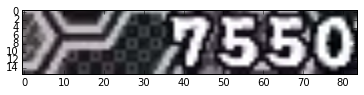

7550

In [24]:
i = 1
filename = '../extracted/out-{}.png'.format(i)
testimg = io.imread(filename)
plt.imshow(NR.clean_img(testimg[52:68,-94:-10,:]))
plt.show()
NR.no_tester(testimg[52:68,-94:-10,:],60,True)
# lol so it looks like when the bg is gray (aka you messed up) my technique doesn't work
# but this doesn't matter since messing up will just have the last score anyways

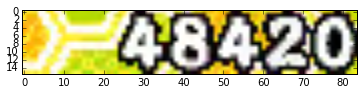

48420

In [26]:
i = 3228
filename = '../extracted/out-{}.png'.format(i)
testimg = io.imread(filename)
plt.imshow(testimg[52:68,-94:-10,:])
plt.show()
NR.no_tester(testimg[52:68,-94:-10,:],60,True)

In [27]:
NR.last_score

550

In [34]:
test_all = []
for i in range(1,3252):
    filename = '../extracted/out-{}.png'.format(i)
    testimg = io.imread(filename)
    test_all += [NR.no_test(testimg[52:68,-94:-10,:])]


In [62]:
test_all

[7550, 7550, 7550, 7550, 7550, 7550, 7550, 7550, 7550]

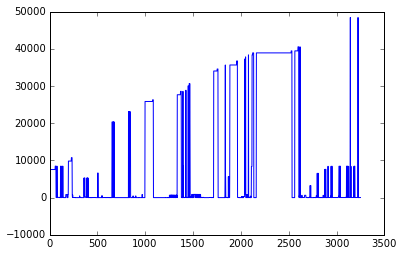

In [66]:
plt.plot(test_all)
# not working so great huh

[0, 3252, -1, 50000]

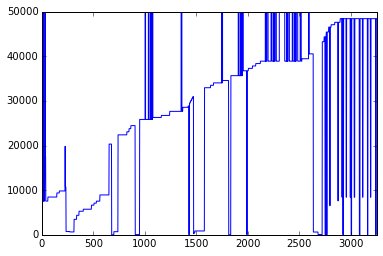

In [100]:
plt.plot(test_all)
plt.axis([0,3252,-1,50000])
# not bad..

[0, 3252, -1, 50000]

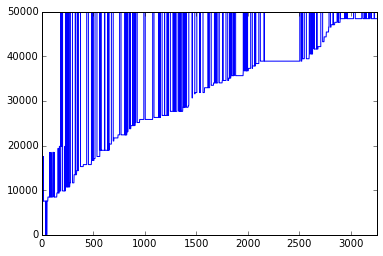

In [110]:
plt.plot(test_all)
plt.axis([0,3252,-1,50000])
# (almost) no more -1s lol

[0, 3252, -1, 50000]

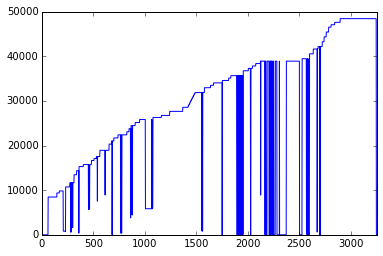

In [171]:
plt.plot(test_all)
plt.axis([0,3252,-1,50000])

[0, 3252, -1, 50000]

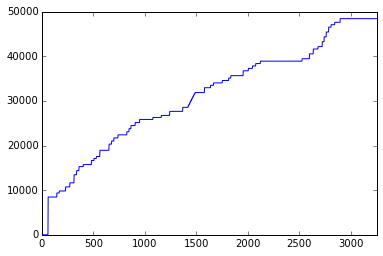

In [181]:
plt.plot(test_all)
plt.axis([0,3252,-1,50000])
#perfect ^-^

[0, 3252, -1, 50000]

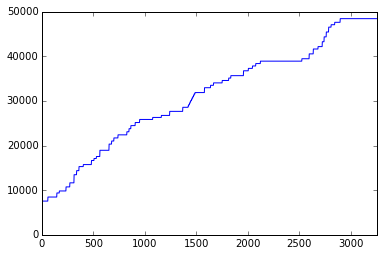

In [35]:
plt.plot(test_all)
plt.axis([0,3252,-1,50000])
#even more perfect ^-^

In [182]:
NR.test_img(frame[52:68,-94:-10,:])

ValueError: invalid literal for int() with base 10: ''

In [199]:
np.savetxt('test_res.csv',np.array(test_all),delimiter=',')

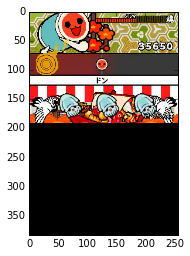

In [51]:
plt.imshow(test_frame)
plt.show()